In [1]:
import pandas as pd
from pandas import json_normalize

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from tqdm import tqdm
import time 


In [3]:
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [6]:
tracks = pd.read_pickle("temp_data/raw_model_tracks.pkl")
tracks.head(2).T

0  \
track.id                                                31nfdEooLEq7dn3UMcIeB5   
track.name                                    Vois sur ton chemin - Techno Mix   
track.external_urls.spotify  https://open.spotify.com/track/31nfdEooLEq7dn3...   
artist_dict                  {0: {'external_urls': {'spotify': 'https://ope...   
track.album.id                                          79Cyc8GRWnLyjdJSMyJ0dB   
track.album.name                              Vois sur ton chemin (Techno Mix)   
track.album.images           [{'height': 640, 'url': 'https://i.scdn.co/ima...   
track.album.release_date                                            2023-08-04   
track.popularity                                                          85.0   
danceability                                                             0.634   
energy                                                                   0.824   
key                                                                        2.0   
loudness                                                                -3.394   
mode                                                                       0.0   
speechiness                                                              0.047   
acousticness                                                            0.0908   
instrumentalness                                                        0.0711   
liveness                                                                 0.119   
valence                                                                  0.371   
tempo                                                                  137.959   
type_x                                                          audio_features   
id_x                                                    31nfdEooLEq7dn3UMcIeB5   
uri_x                                     spotify:track:31nfdEooLEq7dn3UMcIeB5   
track_href                   https://api.spotify.com/v1/tracks/31nfdEooLEq7...   
analysis_url                 https://api.spotify.com/v1/audio-analysis/31nf...   
duration_ms                                                           178156.0   
time_signature                                                             4.0   
artists_dfs                                                         externa...   
external_urls                {'spotify': 'https://open.spotify.com/artist/1...   
href                         https://api.spotify.com/v1/artists/1r43wW70tnG...   
id_y                                                    1r43wW70tnGUauQYvY5w48   
name                                                                   BENNETT   
type_y                                                                  artist   
uri_y                                    spotify:artist:1r43wW70tnGUauQYvY5w48   
song_id                                                 31nfdEooLEq7dn3UMcIeB5   
artist_id                                               1r43wW70tnGUauQYvY5w48   
artist_images                [{'height': 640, 'url': 'https://i.scdn.co/ima...   
artist_name                                                            BENNETT   
artist_popularity                                                           63   
artist_link                  https://open.spotify.com/artist/1r43wW70tnGUau...   
artist_follower                                                          32511   

                                                                             1  
track.id                                                0gMTEHzNIyvxikxyUFFJxO  
track.name                                                          Summertime  
track.external_urls.spotify  https://open.spotify.com/track/0gMTEHzNIyvxikx...  
artist_dict                  {0: {'external_urls': {'spotify': 'https://ope...  
track.album.id                                          3d5e4tp3t5zTGu44NM88LQ  
track.album.name                                                    Summertime  
track.album.images           [{'height': 640, 'url': 'https://i.s

In [5]:
tracks.columns

Index(['track.id', 'track.name', 'track.external_urls.spotify', 'artist_dict',
       'track.album.id', 'track.album.name', 'track.album.images',
       'track.album.release_date', 'track.popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type_x', 'id_x',
       'uri_x', 'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'artists_dfs', 'external_urls', 'href', 'id_y', 'name', 'type_y',
       'uri_y', 'song_id', 'artist_id', 'artist_images', 'artist_name',
       'artist_popularity', 'artist_link', 'artist_follower'],
      dtype='object')

In [13]:
X_tracks = tracks[['track.popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'artist_popularity', 'artist_follower']]

In [14]:
import pickle 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tracks)

pickle.dump(scaler, open('model_data/standardScaler.p', 'wb'))

X_tracks_prep = scaler.transform(X_tracks)


In [15]:
X_tracks_prep

array([[ 2.08679174,  0.3741786 ,  1.03592027, ...,  0.68117523,
         0.89700399, -0.23248505],
       [ 1.86122901,  0.96515283,  0.45006522, ...,  0.58571714,
         1.27241569,  0.04636163],
       [ 1.29732221,  1.21219944,  0.06942493, ...,  0.4253643 ,
         1.27241569,  0.04636163],
       ...,
       [-2.70641608,  1.23157564,  0.30442893, ..., -0.21881675,
        -2.3744408 , -0.23664534],
       [-2.70641608,  1.27032805, -0.95664889, ...,  0.6595007 ,
        -2.3744408 , -0.23664534],
       [-2.70641608,  0.99421714, -0.20860798, ..., -0.70212967,
        -2.3744408 , -0.23664534]])

In [ ]:
# original_model = pickle.load(open('filename.p', 'rb'))

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  6%|████▌                                                                              | 1/18 [00:00<00:07,  2.35it/s]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█████████▏                                                                         | 2/18 [00:00<00:07,  2.15it/s]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

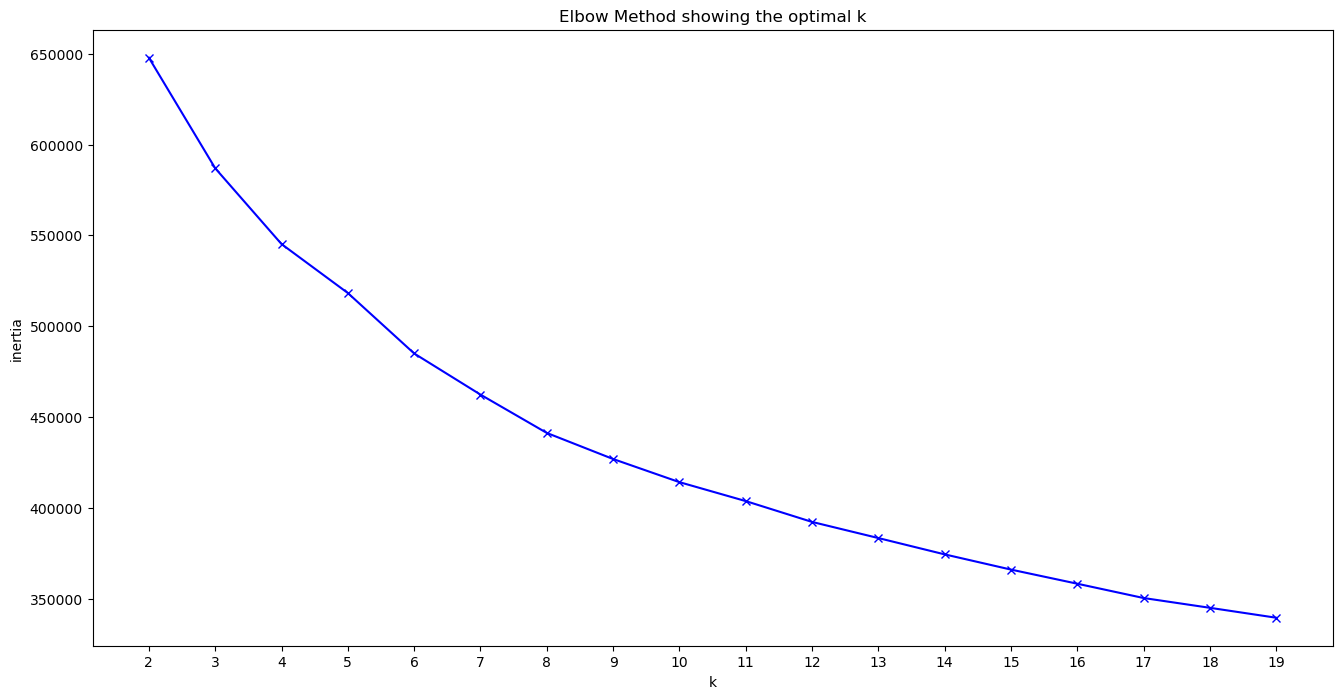

In [16]:
# choosing K fpr k means

from sklearn.cluster import KMeans

import numpy as np
K = range(2, 20)
inertia = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_tracks_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
  6%|████▌                                                                              | 1/18 [00:44<12:28, 44.05s/it]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█████████▏                                                                         | 2/18 [01:26<11:29, 43.11s/it]C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

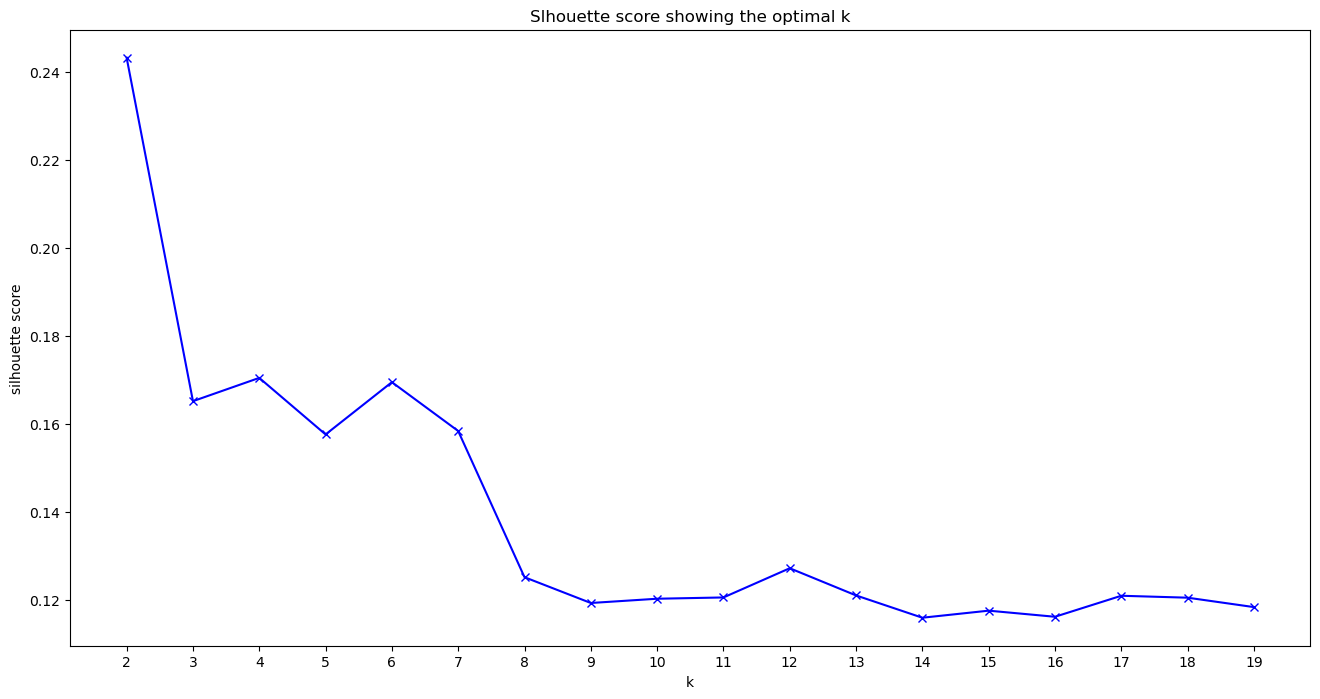

In [17]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_tracks_prep)
    silhouette.append(silhouette_score(X_tracks_prep, kmeans.predict(X_tracks_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [18]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=6)
kmeans.fit(X_tracks_prep)

pickle.dump(kmeans, open('model_data/kmean_Model.p', 'wb'))

C:\Users\Domen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_tracks_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     1238
1     3878
2    16906
3    16831
4     3785
5    18349
dtype: int64

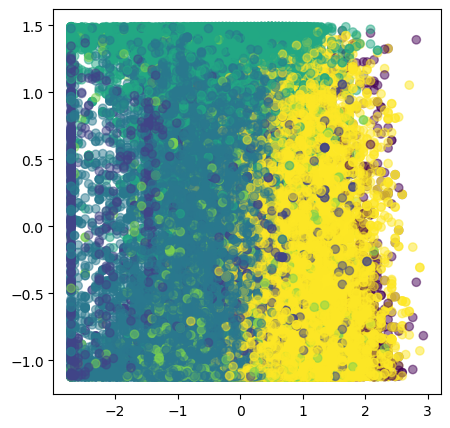

In [20]:
plt.figure(figsize=(5, 5))
plt.scatter(X_tracks_prep[:, 0], X_tracks_prep[:, 7], c=clusters,alpha=0.5)
plt.show()

In [21]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_tracks_prep)

PCA()

In [22]:
X_tracks_pca = pca.transform(X_tracks_prep)
X_tracks_pca

array([[-2.06182561e+00,  1.24881818e+00, -3.41842399e-03, ...,
        -6.55745998e-01, -2.57086637e-01,  3.28109042e-02],
       [-2.11276986e+00,  1.28688198e+00, -1.00781711e+00, ...,
        -3.37994278e-01, -1.36454932e-01,  1.78381151e-02],
       [-1.56134102e+00,  9.39923074e-01, -1.08373276e+00, ...,
        -6.63416853e-03, -3.67461435e-01,  2.80697061e-01],
       ...,
       [ 9.71753509e-01, -3.13345837e+00, -1.01762092e+00, ...,
         3.24424678e-01, -2.64929581e-01,  4.13502428e-01],
       [ 2.75239733e-01, -3.32765997e+00, -2.05525249e+00, ...,
        -1.48611082e-01,  1.20687496e+00, -2.22096207e-01],
       [ 2.11942526e-01, -3.60951833e+00, -2.47726887e+00, ...,
         1.11224968e-01,  6.26866624e-01, -5.09343940e-01]])

In [25]:
# import seaborn as sns
# df = pd.DataFrame()
# df["y"] = clusters
# df["comp_pca-1"] = X_tracks_pca[:,0]
# df["comp-pca-2"] = X_tracks_pca[:,1]


# plt.figure(figsize=(15 , 10))
# sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
#                 palette=sns.color_palette("Paired", 5),
#                 data=df).set(title="Song Cluster plot using pca") 

ValueError: Could not interpret value `comp-1` for parameter `x`

<Figure size 1500x1000 with 0 Axes>

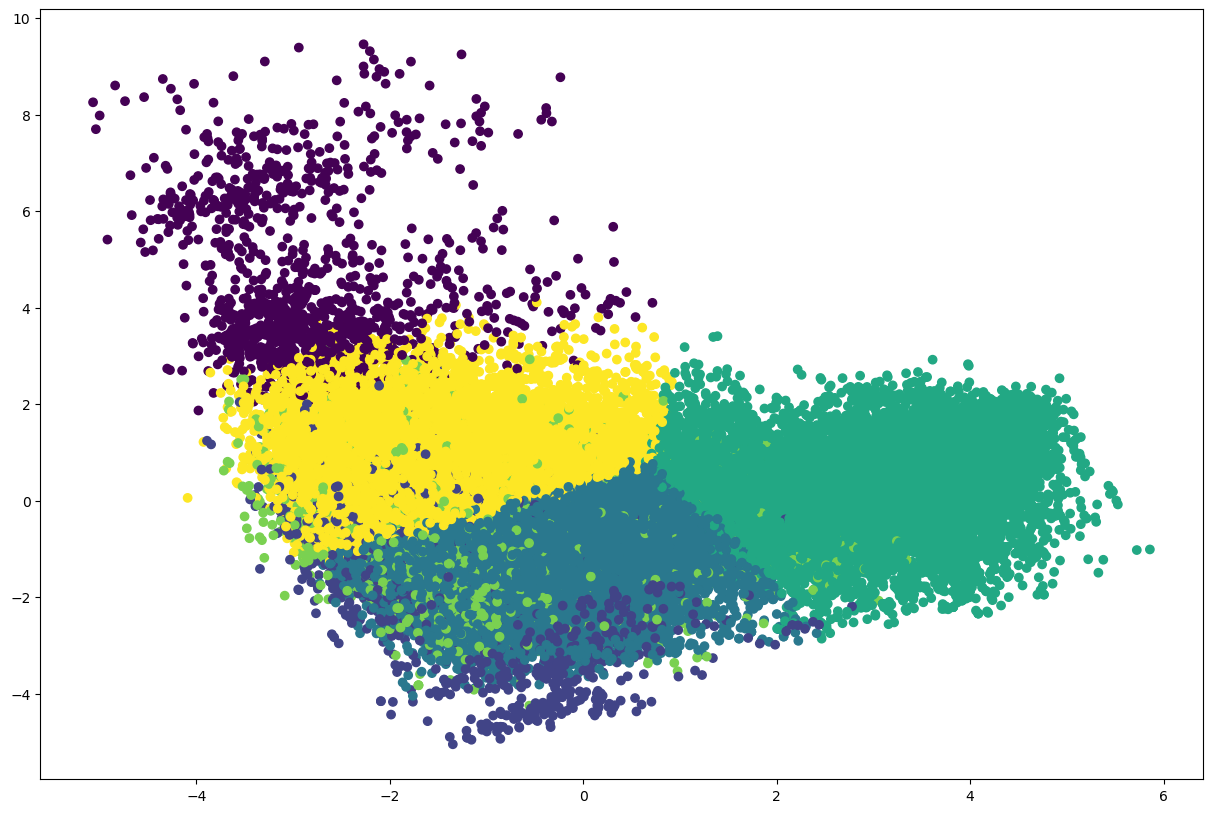

In [26]:
plt.figure(figsize=(15, 10))
plt.scatter(X_tracks_pca[:,0],X_tracks_pca[:,1], c = clusters)



In [27]:
from sklearn.manifold import TSNE

In [28]:
X_tracks_prep[0]

array([ 2.08679174,  0.3741786 ,  1.03592027, -0.89728949,  0.99266945,
       -1.26309634, -0.40349463, -0.88484896, -0.59299761, -0.37228593,
       -0.18340842,  0.68117523,  0.89700399, -0.23248505])

In [29]:
tsne = TSNE(n_components = 2, perplexity = 5)

In [30]:
X_tracks_tsne = tsne.fit_transform(X_tracks_prep)

X_tracks_tsne

array([[ -44.71202 ,  -10.974864],
       [ -59.07219 ,  -15.011379],
       [-104.54355 ,  -21.97711 ],
       ...,
       [  29.939003,  -18.096624],
       [ -11.98516 ,  -78.918076],
       [  10.633406, -107.51503 ]], dtype=float32)

In [31]:
import seaborn as sns
df = pd.DataFrame()
df["y"] = clusters
df["comp-1"] = X_tracks_tsne[:,0]
df["comp-2"] = X_tracks_tsne[:,1]

# sns.scatterplot(x = X_tracks_tsne[:,0], X_tracks_tsne[:,1], data = X_tracks_tsne)

C:\Users\Domen\AppData\Local\Temp\ipykernel_42676\1604626823.py:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

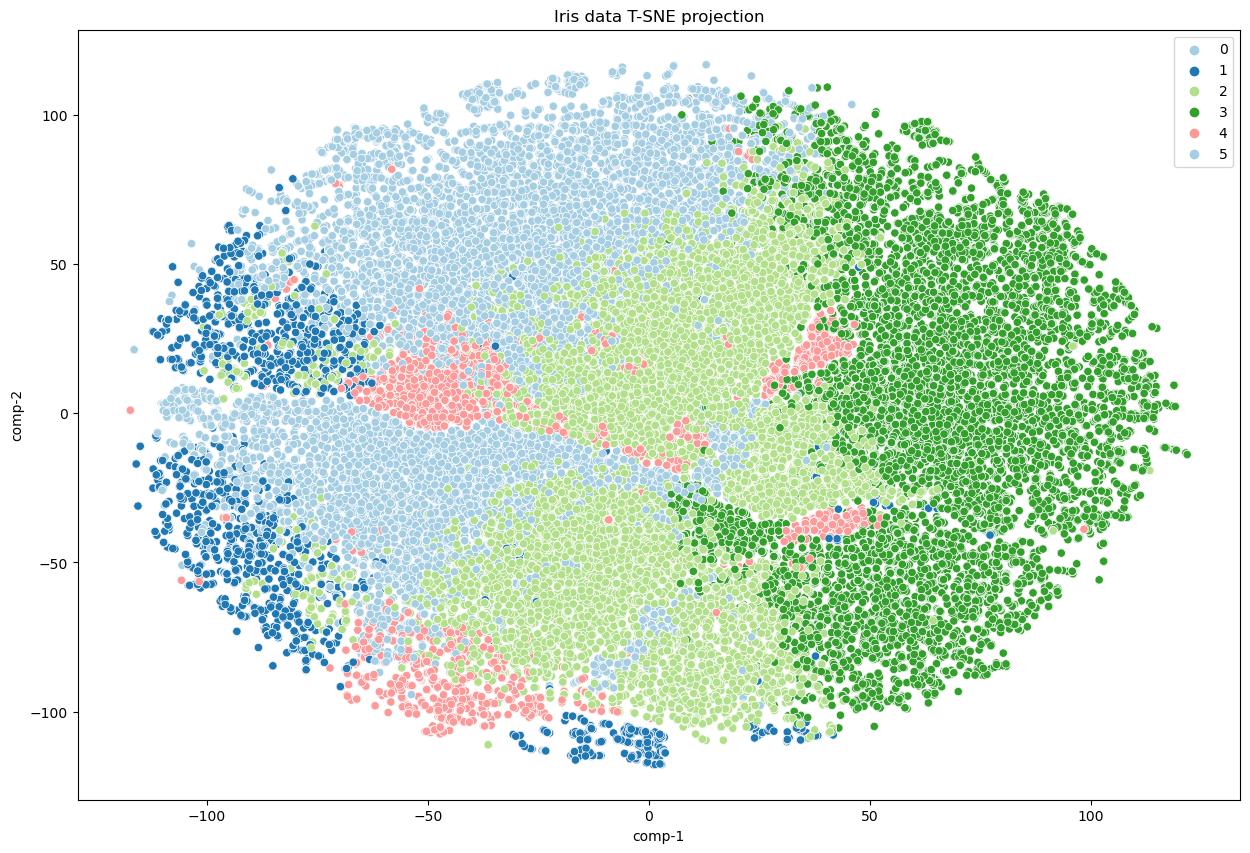

In [32]:


plt.figure(figsize=(15 , 10))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("Paired", 5),
                data=df).set(title="Iris data T-SNE projection") 

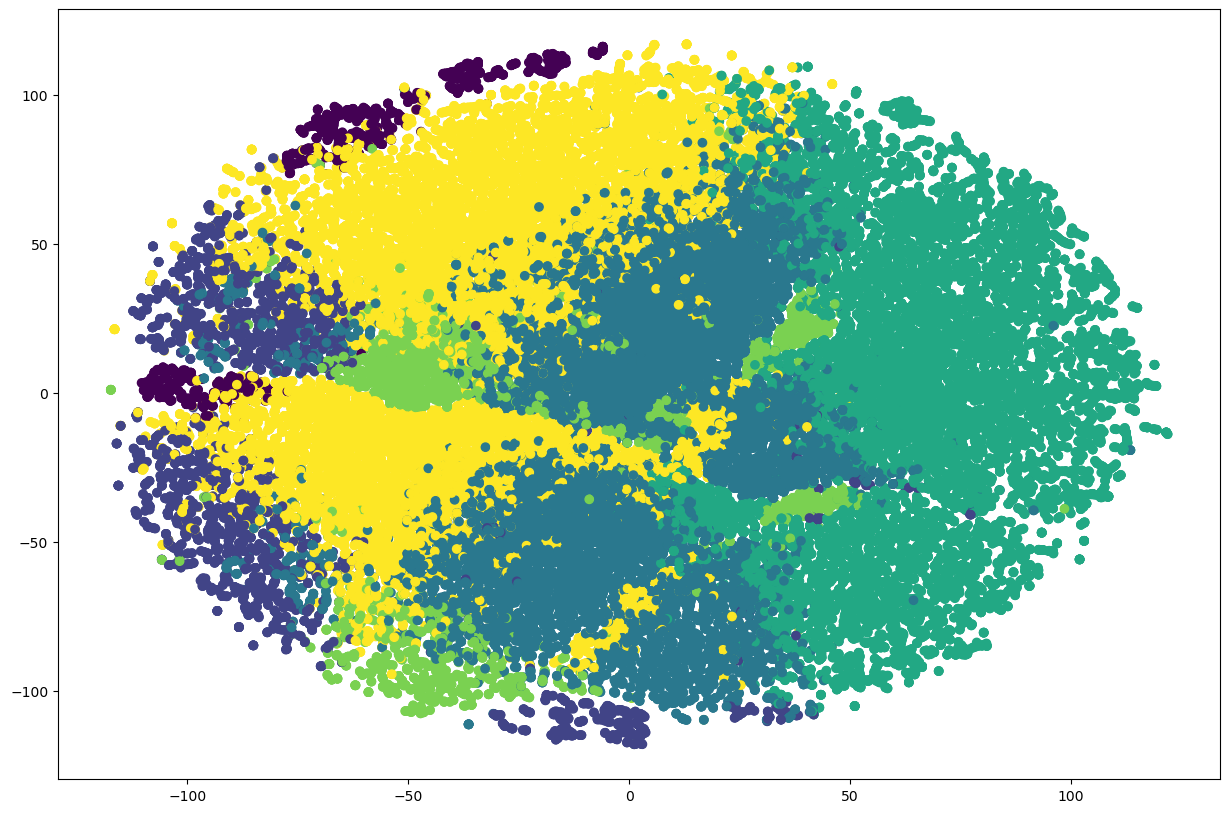

In [33]:
plt.figure(figsize=(15, 10))
plt.scatter(X_tracks_tsne[:,0],X_tracks_tsne[:,1], c = clusters)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

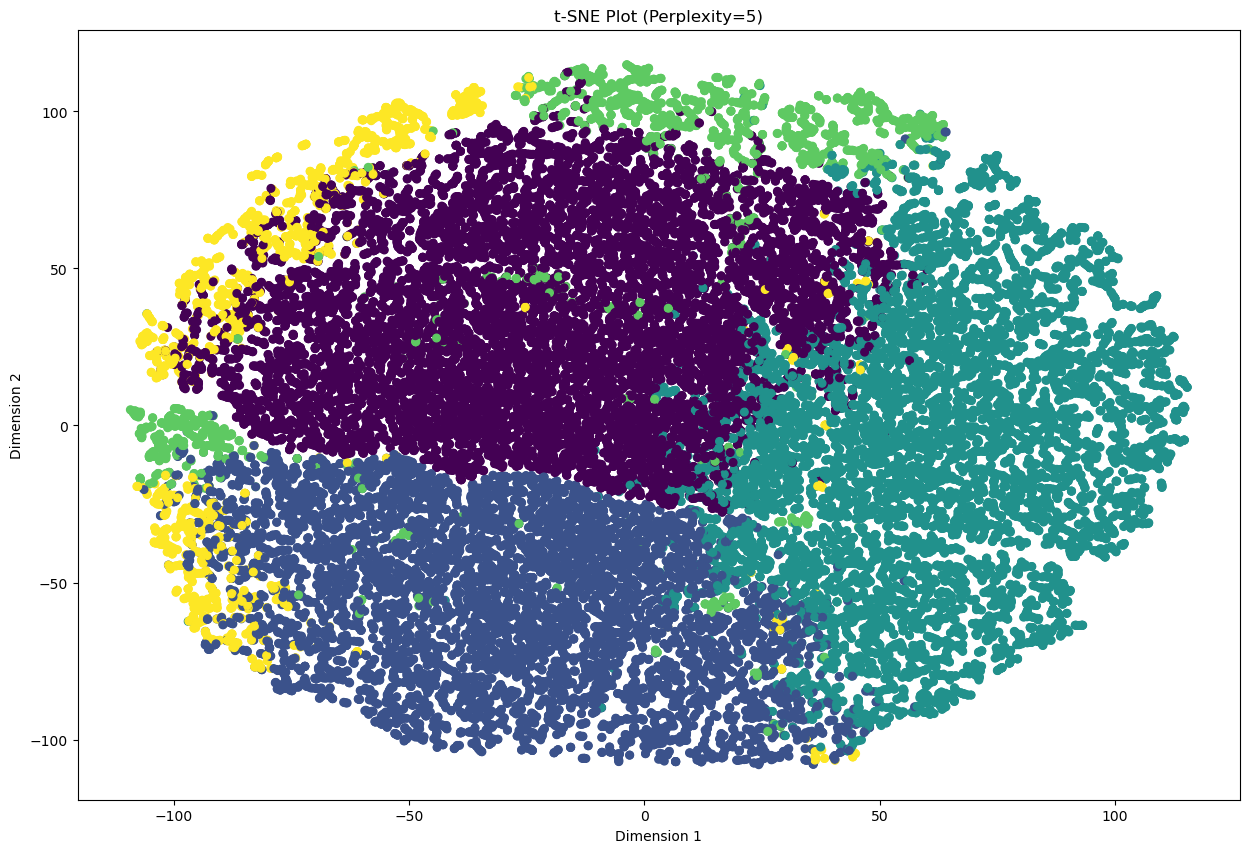

 20%|████████████████▌                                                                  | 1/5 [01:58<07:52, 118.25s/it]

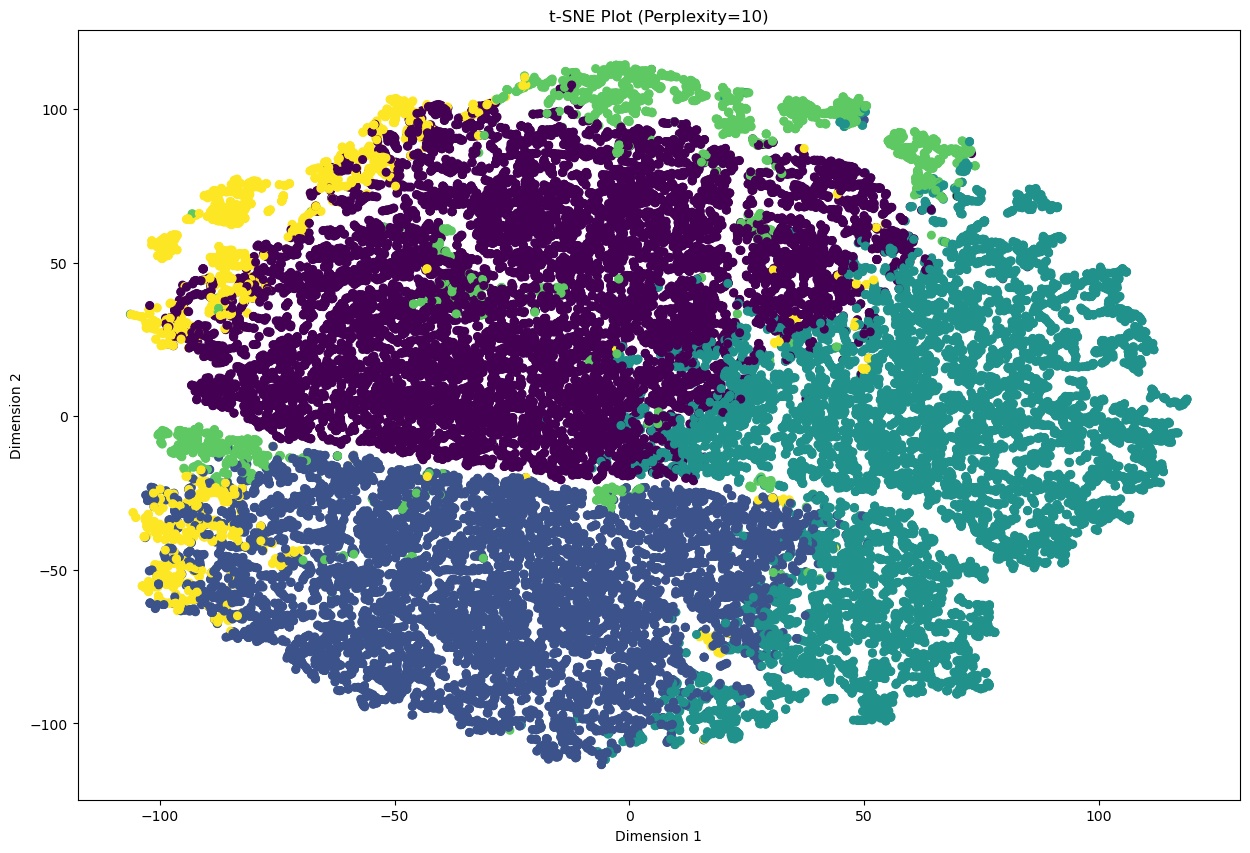

 40%|█████████████████████████████████▏                                                 | 2/5 [04:02<06:06, 122.05s/it]

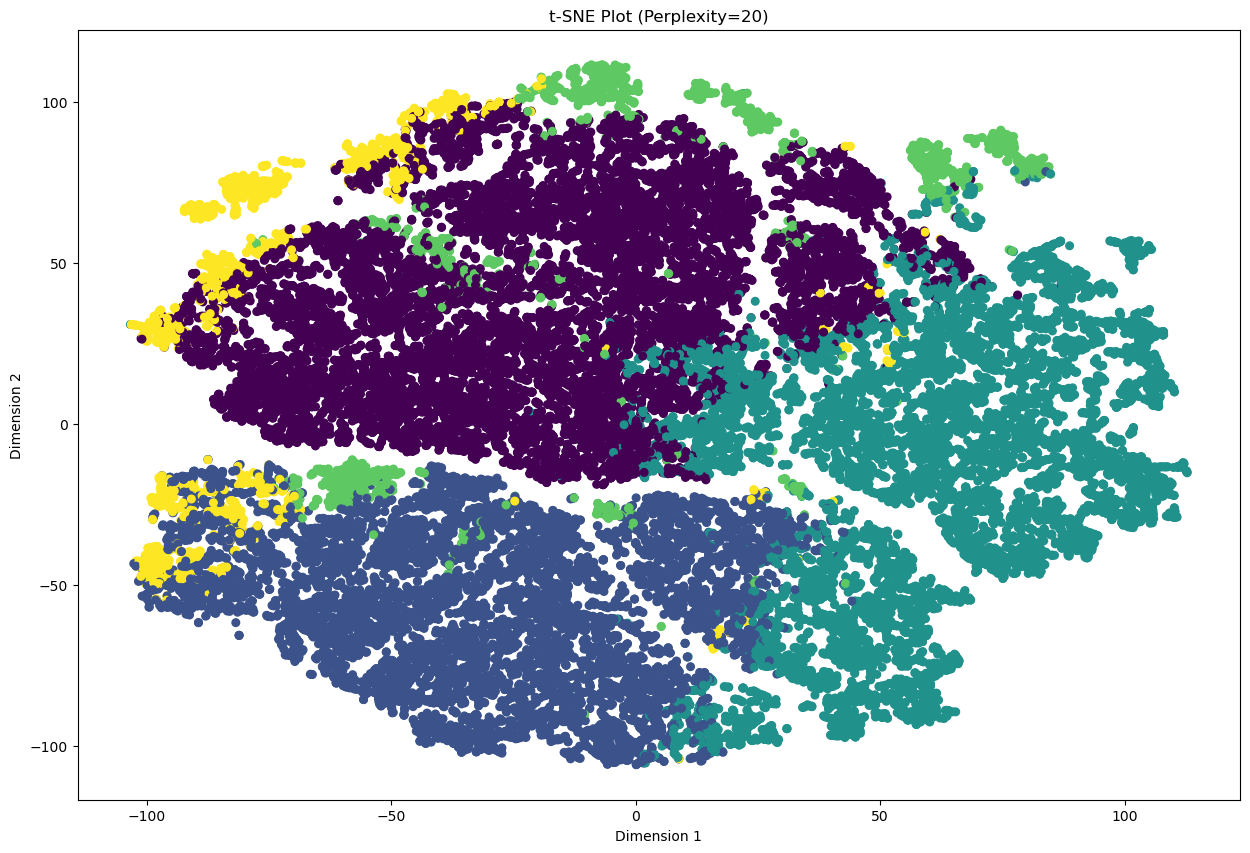

 60%|█████████████████████████████████████████████████▊                                 | 3/5 [06:42<04:38, 139.25s/it]

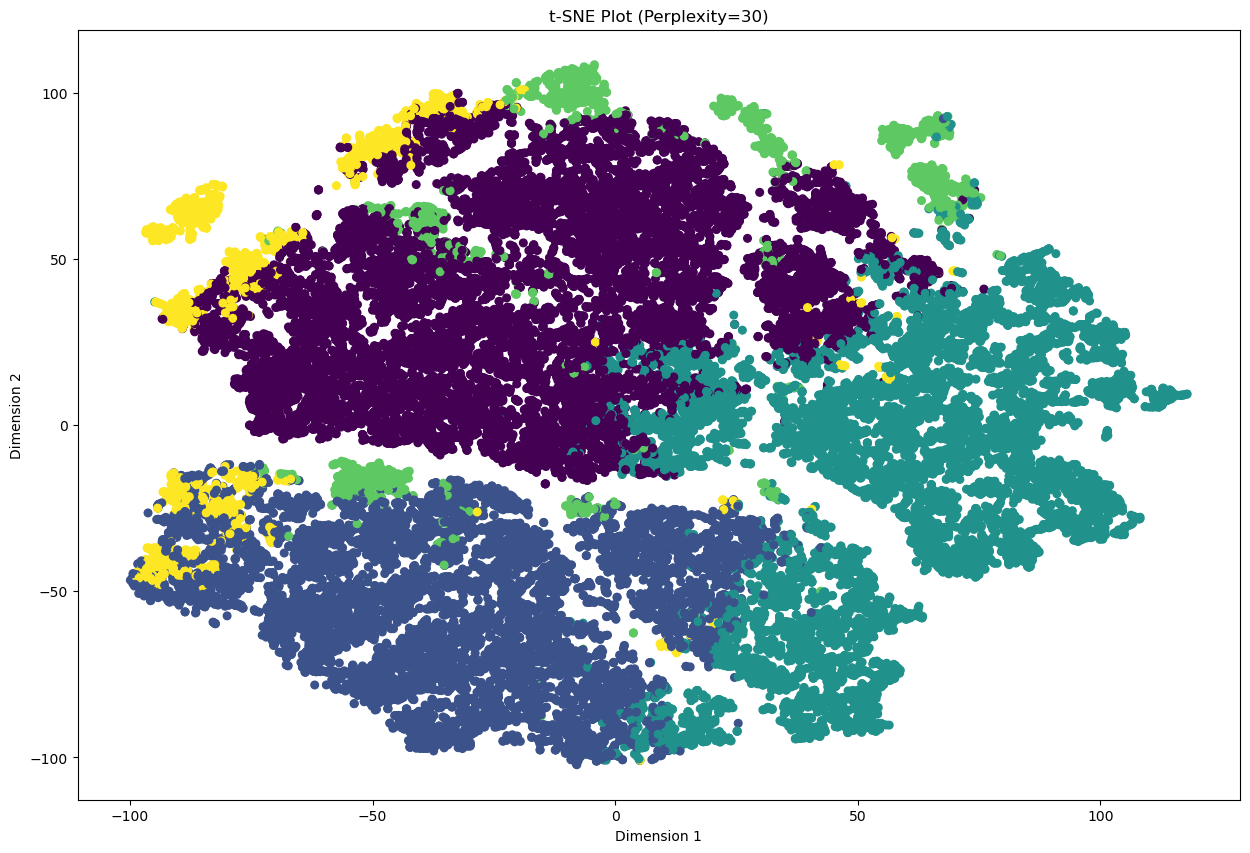

 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [09:16<02:24, 145.00s/it]

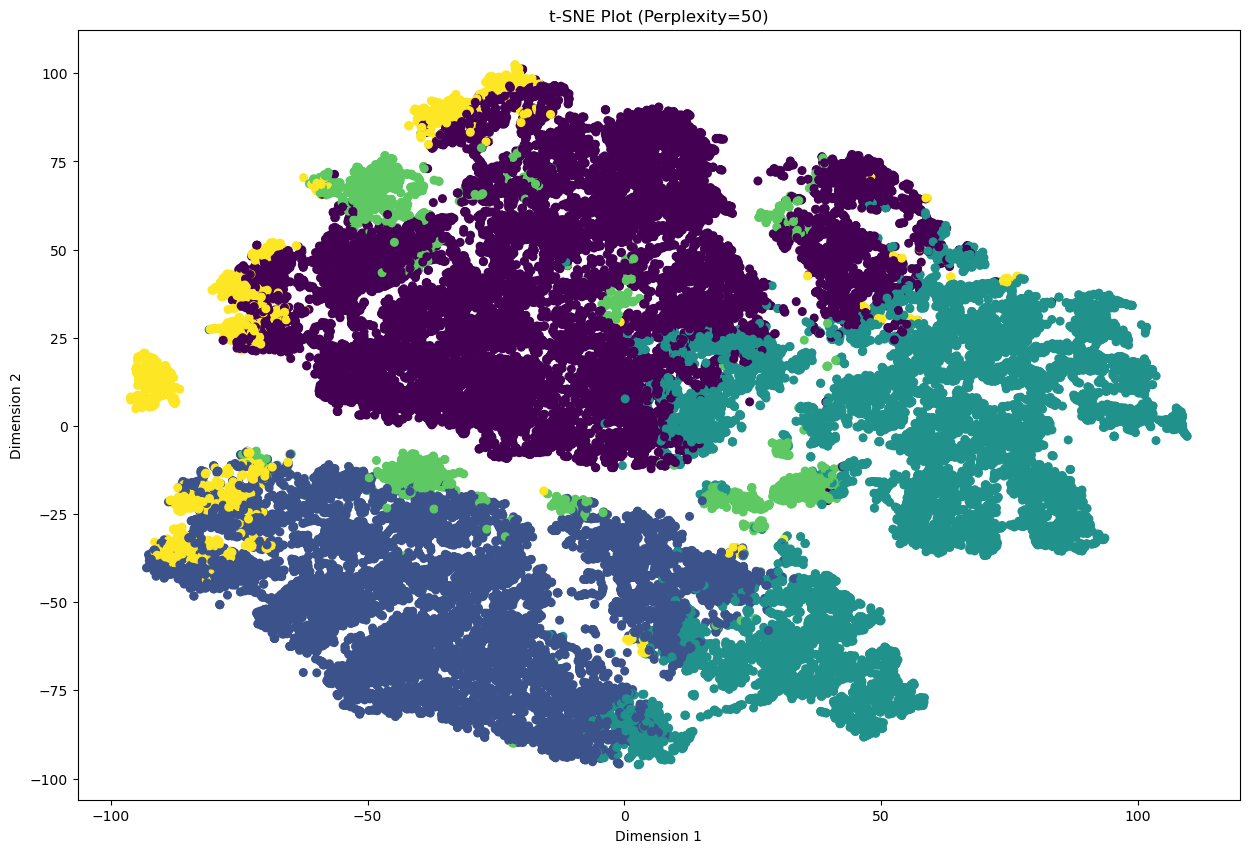

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [12:30<00:00, 150.05s/it]


In [30]:

# perplexity_values = [5, 10, 20, 30, 50]

# for perplexity in tqdm(perplexity_values):
#     # t-SNE-Modell erstellen
#     tsne = TSNE(n_components=2, perplexity=perplexity)

#     # t-SNE auf die Daten anwenden
#     X_tsne = tsne.fit_transform(X_tracks_prep)


#     plt.figure(figsize=(15 , 10))
#     plt.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='o', s=30, c = clusters)
#     plt.title(f't-SNE Plot (Perplexity={perplexity})')
#     plt.xlabel('Dimension 1')
#     plt.ylabel('Dimension 2')
#     plt.show()